In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.reset_orig()

root_path = Path().cwd().parent.parent
data_path = root_path / "common" / "resources" / "datasets"
figures_path = Path().resolve() / "figures"

# Generate data

In [60]:
n = 10000
x = np.linspace(0, 100, n)

y = x * (1 + np.sin(x / 10) ** 2)
y_noisy = y + x * np.random.randn(n) / 4

df = pd.DataFrame({"x": x, "y": y_noisy})
df.to_csv(data_path / "histogram.csv")

**Base practice**:
Some students had a group assignment: some of them measured the length of spring under some "black box" force and the other part should interpret the collected data. While guys from the first group were doing their work for too long and had to go to another class, they did not communicate much with the second group and left them with the data tet-a-tet. The second group wants to understand overall distributions of `x` and `y`

Text(0.5, 1.0, 'Distributions of x and y')

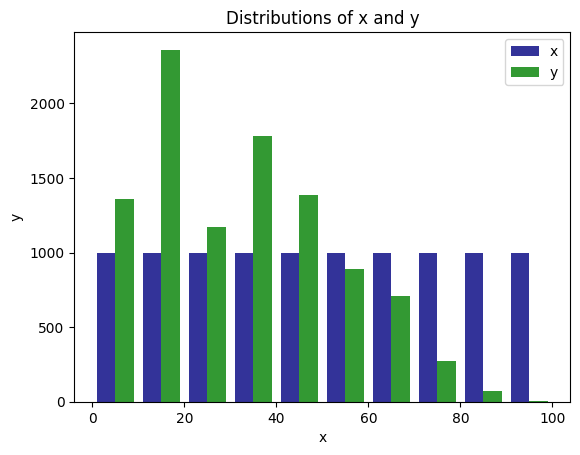

In [50]:
fig, ax = plt.subplots()
df["y"] /= df["y"].max() / df["x"].max()
ax.hist(df, bins=10, color=["navy", "green"], label=["x", "y"], alpha=0.8)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.set_title("Distributions of x and y")

**Advanced practice**:
After some analyzing the distributions of `x` and `y` themselves, the second group wants to understand, how black box acts on the spring in some "interesting" regions. Some of the guys from the first group explained how should black box act, and now the second group would like to compare the action with the theoretical model. So now they want to check the dependency of `y_theoretical` on `x`, then check the distribution of collected `y` in "interesting" regions.

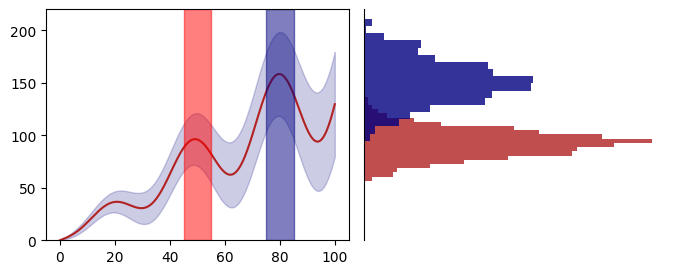

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

ax = axs[0]

ax.plot(x, y, color="firebrick", zorder=1)
ax.fill_between(x, y - x / 2, y + x / 2, color="navy", alpha=0.2, zorder=0)

ax.axvspan(45, 55, alpha=0.5, color="red")
ax.axvspan(75, 85, alpha=0.5, color="navy")
ax.set_ylim(0, 220)

ax = axs[1]
dist1 = y_noisy[np.where((x >= 45) & (x <= 55))]
dist2 = y_noisy[np.where((x >= 75) & (x <= 85))]

ax.hist(dist1, bins=20, color="firebrick", orientation="horizontal", alpha=0.8, density=True)
ax.hist(dist2, bins=20, color="navy", orientation="horizontal", alpha=0.8, density=True)

ax.set_ylim(0, 220)

ax.spines[["right", "top", "bottom"]].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

fig.subplots_adjust(wspace=0.05)